In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8774 - loss: 0.4259
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9644 - loss: 0.1181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9829 - loss: 0.0561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0405


In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0728

Test accuracy: 0.9767000079154968


In [8]:
# Make predictions on test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


In [10]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

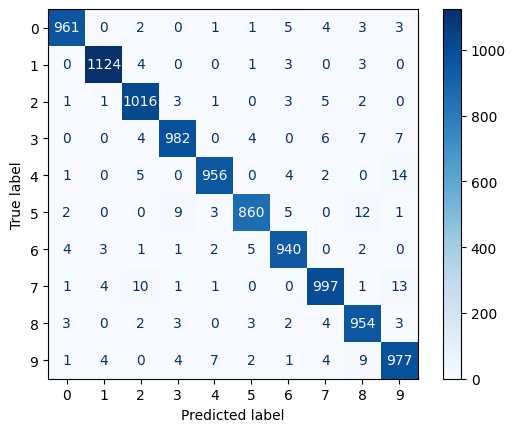

In [11]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
# Function to plot an image and its predicted label
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel("Actual: {}".format(true_label))
    plt.title("Predicted: {}".format(np.argmax(predictions_array)))
    plt.show()

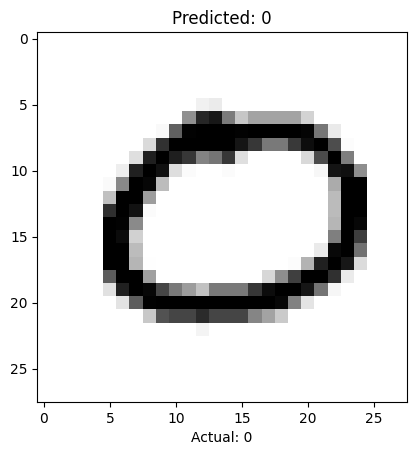

In [14]:
# Plot the first test image and its prediction
plot_image(69, predictions, y_test, x_test)